<a href="https://colab.research.google.com/github/joker2017/Calculator/blob/master/parsing_instagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import json

class Instagram_Parser:

    def __init__(self, username):
        self.data = None
        self.username = username
        self.fetchData()

    def fetchData(self):
        pt = requests.get("https://instagram.com/{}".format(self.username)).text
        jd = pt.split("window._sharedData = ")[1].split(";</script>")[0]
        jj = json.loads(jd)
        self.data = jj

    def getFollowers(self):
        return self.data['entry_data']['ProfilePage'][0]['graphql']['user']['edge_followed_by']['count']

    def getFollowing(self):
        return self.data['entry_data']['ProfilePage'][0]['graphql']['user']['edge_follow']['count']

    def getPostsCount(self):
        return self.data['entry_data']['ProfilePage'][0]['graphql']['user']['edge_owner_to_timeline_media']['count']

    def getFullName(self):
        return self.data['entry_data']['ProfilePage'][0]['graphql']['user']['full_name']

    def getProfilePic(self):
        return {
            "lowres": self.data['entry_data']['ProfilePage'][0]['graphql']['user']['profile_pic_url'],
            "highres": self.data['entry_data']['ProfilePage'][0]['graphql']['user']['profile_pic_url_hd']
        }

    def getBio(self):
        return self.data['entry_data']['ProfilePage'][0]['graphql']['user']['biography']


inst = Instagram_Parser("nikita.danil0v")
print(inst.getFollowers(), inst.getFollowing(), inst.getPostsCount(), inst.getFullName())

313 262 61 N I K I T A   D A N I L O V


In [23]:
from urllib import request 
import urllib
import requests
import datetime
from bs4 import BeautifulSoup
import re
import json


USER_NAME = 'valentivitell' # add instagram username
COUNT_PICTURES = 5 # number of pictures


def download_file(url):
	print('Downloading image...')
	f = urllib.request.urlopen(url)
	htmlSource = f.read()
	soup = BeautifulSoup(htmlSource,'html.parser')
	metaTag = soup.find_all('meta', {'property':'og:image'})
	imgURL = metaTag[0]['content']
	fileName = datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S") + '.jpg'
	urllib.request.urlretrieve(imgURL, fileName)
	print('Done. Image saved to disk as ' + fileName)

soup = BeautifulSoup(request.urlopen('https://www.instagram.com/' + USER_NAME),'html.parser')
metaTag = soup.find_all('script', type="text/javascript")
pattern = 'window._sharedData = {.+};</script>'
parse_text = re.findall(pattern, str(metaTag))
parse_text = parse_text[0].replace(';</script>', '')
parse_text = parse_text.replace('window._sharedData = ', '')

json_dict = json.loads(parse_text)
print(json_dict)
short_adress = []
# shortcode - code picture
for number in range(len(json_dict['entry_data']['ProfilePage'][0]['graphql']['user']['edge_owner_to_timeline_media']['edges'])):
	short_adress.append(json_dict['entry_data']['ProfilePage'][0]['graphql']['user']['edge_owner_to_timeline_media']['edges'][number]['node']['shortcode'])

temp_url = 'https://www.instagram.com/p/'   #https://www.instagram.com/p/BsiHNlPngr9

for item in range(COUNT_PICTURES):
	download_file(temp_url + short_adress[item])

print('All pictures are downloaded!')

{'config': {'csrf_token': 'YFrBkerMbuhcC98IrAR0UqxSU8Z4ILDT', 'viewer': None, 'viewerId': None}, 'supports_es6': False, 'country_code': 'US', 'language_code': 'en', 'locale': 'en_US', 'entry_data': {'ProfilePage': [{'logging_page_id': 'profilePage_1090074015', 'show_suggested_profiles': False, 'graphql': {'user': {'biography': 'MOSCOW 👀direct📩valentivitel@mail.ru', 'blocked_by_viewer': False, 'country_block': False, 'external_url': None, 'external_url_linkshimmed': None, 'edge_followed_by': {'count': 1626833}, 'followed_by_viewer': False, 'edge_follow': {'count': 37}, 'follows_viewer': False, 'full_name': 'Vi', 'has_channel': False, 'has_blocked_viewer': False, 'highlight_reel_count': 7, 'has_requested_viewer': False, 'id': '1090074015', 'is_business_account': False, 'is_joined_recently': False, 'business_category_name': None, 'business_email': None, 'business_phone_number': None, 'business_address_json': None, 'is_private': False, 'is_verified': True, 'edge_mutual_followed_by': {'coun

In [7]:
import os
print( os.listdir('/content') )

['.config', 'images', 'output', '2019-01-15_07:46:14.jpg', 'posenet-python', '2019-01-15_07:46:11.jpg', 'InstaParser', '_models', '2019-01-15_07:46:12.jpg', '2019-01-15_07:46:13.jpg', 'sample_data']


<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

<h1>Welcome to Colaboratory!</h1>
Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [TensorFlow with TPU](/notebooks/tpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)
- [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf

input1 = tf.ones((2, 3))
input2 = tf.reshape(tf.range(1, 7, dtype=tf.float32), (2, 3))
output = input1 + input2

with tf.Session():
  result = output.eval()
result  

array([[2., 3., 4.],
       [5., 6., 7.]], dtype=float32)

### GitHub

For a full discussion of interactions between Colab and GitHub, see [Using Colab with GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb). As a brief summary:

To save a copy of your Colab notebook to Github, select *File → Save a copy to GitHub…*

To load a specific notebook from github, append the github path to http://colab.research.google.com/github/.
For example to load this notebook in Colab: [https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb) use the following Colab URL: [https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/_index.ipynb)

To open a github notebook in one click, we recommend installing the [Open in Colab Chrome Extension](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo).



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

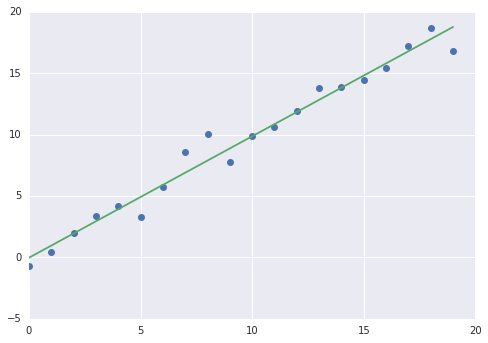

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

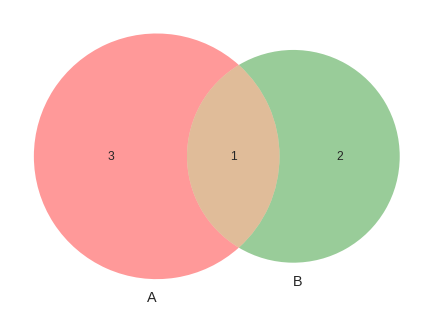

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).